In [1]:
'''
Samuel Grant 2024
Analyse CRV efficiency from TrkAna in KPP geometry 

KPP: three tiers, top and bottom tiers are trigger tiers, middle is the measurement tier
* Two CRV-D modules with scintillator bars parallel to the DS axis (sector 3) 
* Four CRV-T modules with scintillator bars perpendicular to the DS axis (sector 1) 
* Two CRV side end cap modules with scintillator bars perpendicular to the DS axis (sector 2)

Procedure: 
 
1. Find coincidences in all sectors for each unique eventID/runid/subrunid. TrkAna V4 crvcoincs are already concidences, but we can tighten the conditions if desired.
2. Filter the dataset by particle and the number of cosmics per trigger sector -- simplify things and remove the need for clustering.
3. Trigger on cosmics in the top and bottom tier.
4. Check for successful and unsuccessful triggers. 
5. Calculate the inefficiency and write the failures to file. 

'''

'\nSamuel Grant 2024\nAnalyse CRV efficiency from TrkAna in KPP geometry \n\nKPP: three tiers, top and bottom tiers are trigger tiers, middle is the measurement tier\n* Two CRV-D modules with scintillator bars parallel to the DS axis (sector 3) \n* Four CRV-T modules with scintillator bars perpendicular to the DS axis (sector 1) \n* Two CRV side end cap modules with scintillator bars perpendicular to the DS axis (sector 2)\n\nProcedure: \n \n1. Find coincidences in all sectors for each unique eventID/runid/subrunid. TrkAna V4 crvcoincs are already concidences, but we can tighten the conditions if desired.\n2. Filter the dataset by particle and the number of cosmics per trigger sector -- simplify things and remove the need for clustering.\n3. Trigger on cosmics in the top and bottom tier.\n4. Check for successful and unsuccessful triggers. \n5. Calculate the inefficiency and write the failures to file. \n\n'

In [2]:
# External libraries
import uproot
import awkward as ak
import numpy as np

In [3]:
# Internal libraries 
%run PlotFitUtils.ipynb

<>:48: SyntaxWarning: invalid escape sequence '\m'
<>:48: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_5220/2042395069.py:48: SyntaxWarning: invalid escape sequence '\m'
  legendText = [f"Entries: {N}\nMean: {Round(mean, 3)}\nStd Dev: {Round(stdDev, 3)}", f"\nNorm: {Round(norm,3)}\n$\mu$: {Round(mu,3)}\n$\sigma$: {Round(sigma, 3)}"]
/tmp/ipykernel_5220/2042395069.py:48: SyntaxWarning: invalid escape sequence '\s'
  legendText = [f"Entries: {N}\nMean: {Round(mean, 3)}\nStd Dev: {Round(stdDev, 3)}", f"\nNorm: {Round(norm,3)}\n$\mu$: {Round(mu,3)}\n$\sigma$: {Round(sigma, 3)}"]


In [4]:
# Configuration 
# How to make a file list? See Yuri's tools. 
finName="/exp/mu2e/data/users/sgrant/CRVSim/CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.000/11946817/00/00033/nts.sgrant.CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.001205_00000080.root"
particle = "all"
coincidenceConditions = "10PEs2Layers" 
reproc = "MDC2020ae" # "original"
coincidenceFilter = "one_coincidence_per_trigger_sector"
doutTag = finName.split('.')[-2] 
foutTag = particle + "_" + coincidenceConditions + "_" + coincidenceFilter 

print("\n---> Running with inputs:\n")
print("\tfinName:", finName)
print("\tparticle:", particle)
print("\tcoincidenceConditions:", particle)
print("\tcoincidenceFilter:", coincidenceFilter)
print("\tdoutTag:", doutTag)
print("\tfoutTag:", foutTag)


---> Running with inputs:

	finName: /exp/mu2e/data/users/sgrant/CRVSim/CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.000/11946817/00/00033/nts.sgrant.CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.001205_00000080.root
	particle: all
	coincidenceConditions: all
	coincidenceFilter: one_coincidence_per_trigger_sector
	doutTag: 001205_00000080
	foutTag: all_10PEs2Layers_one_coincidence_per_trigger_sector


In [53]:
# Awkward arrays
arrays_ = ak.Array([])
with uproot.open(finName+":TrkAnaExt/trkana") as tree: 
    arrays_ = tree.arrays(["evtinfo.", "crvcoincs", "crvcoincsmc"]) # , "kl", "klfit", "klkl"]) 

<>:52: SyntaxWarning: invalid escape sequence '\m'
<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:52: SyntaxWarning: invalid escape sequence '\m'
<>:54: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_5220/516173849.py:52: SyntaxWarning: invalid escape sequence '\m'
  , xlabel="PEs $\minus$ PEs per layer sum", ylabel="Coincidences", label_=["Top", "Middle", "Bottom"], fout=f"Images/Analyse/{reproc}/Sanity/h1_PEsDiff_{foutTag}.png", logY=True)
/tmp/ipykernel_5220/516173849.py:54: SyntaxWarning: invalid escape sequence '\m'
  , xlabel="PEs $\minus$ PEs per layer sum", ylabel="Coincidences", label_=["All modules"], fout=f"Images/Analyse/{reproc}/Sanity/h1_PEsDiffAll_{foutTag}.png", logY=True, includeBlack=True)



---> Making sanity plots
sectors_: [1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 3, 1, ..., 1, 2, 3, 1, 1, 3, 1, 2, 1, 1, 1, 1]
t_: [3.78e+04, 3.8e+04, 3.8e+04, 5.74e+04, ..., 2.99e+04, 5.64e+04, 5.88e+04]
x_: [-1.56e+03, -262, -78.5, 1.4e+03, ..., 900, 1.93e+03, -1.31e+03, -2.47e+03]
y_: [4.77e+03, 4.77e+03, 4.61e+03, 4.78e+03, ..., 4.77e+03, 4.77e+03, 4.76e+03]
z_: [535, 651, -437, -1.18e+03, -1.21e+03, -190, ..., -437, 458, 29.6, 896, 115]
PEs_: [631, 622, 581, 578, 566, 753, 574, 609, ..., 599, 545, 501, 468, 613, 600, 381]
PEsPerLayer_: [[154, 164, 153, 160], [86.2, 282, 125, 128], ..., [...], [124, 147, 110, 0]]
nHits_: [17, 20, 8, 17, 16, 16, 17, 17, 16, 17, ..., 17, 16, 16, 18, 8, 16, 18, 18, 12]
nLayers_: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..., 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3]
slopes_: [0.326, 0.108, -9.62e-12, -0.278, -0.158, ..., -0.381, -0.198, 0.329, 0.327]


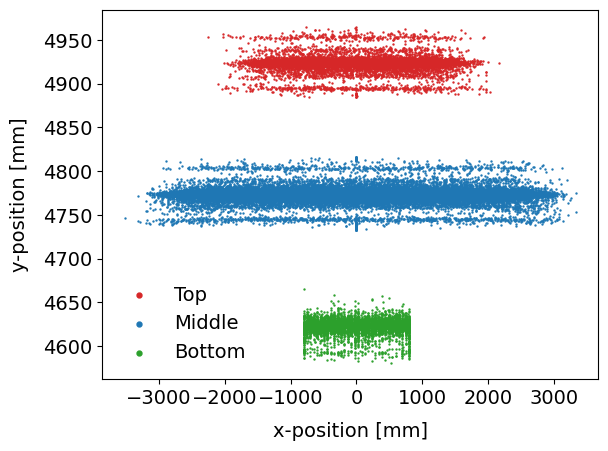

---> Written Images/Analyse/MDC2020ae/Sanity/gr_XY_all_10PEs2Layers_one_coincidence_per_trigger_sector.png


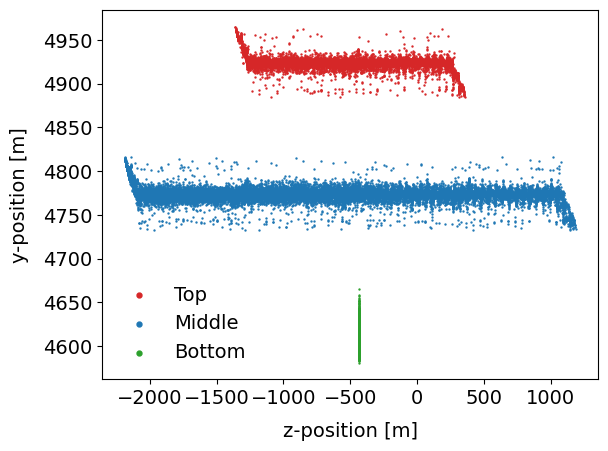

---> Written Images/Analyse/MDC2020ae/Sanity/gr_ZY_all_10PEs2Layers_one_coincidence_per_trigger_sector.png


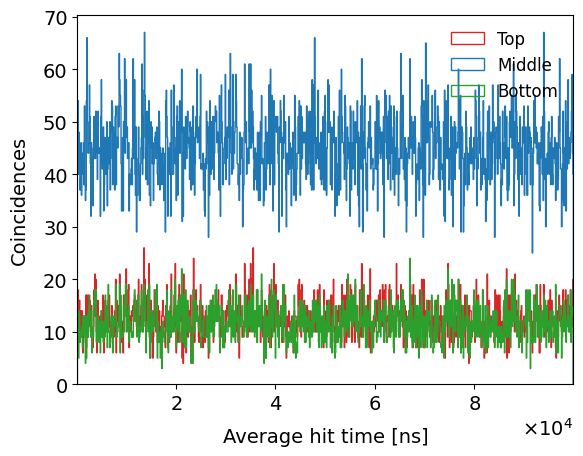

---> Written Images/Analyse/MDC2020ae/Sanity/h1_times_all_10PEs2Layers_one_coincidence_per_trigger_sector.png


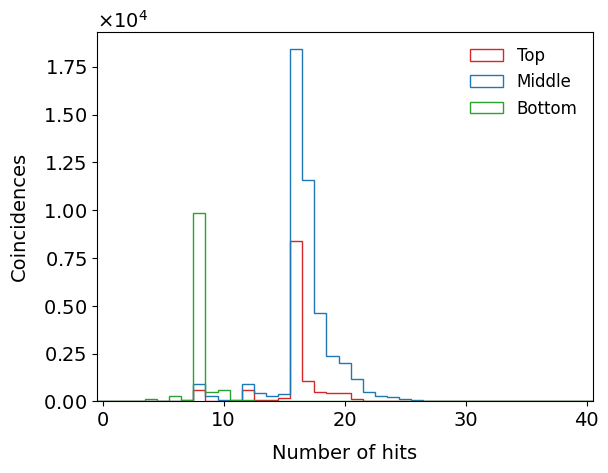

---> Written Images/Analyse/MDC2020ae/Sanity/h1_nHits_all_10PEs2Layers_one_coincidence_per_trigger_sector.png


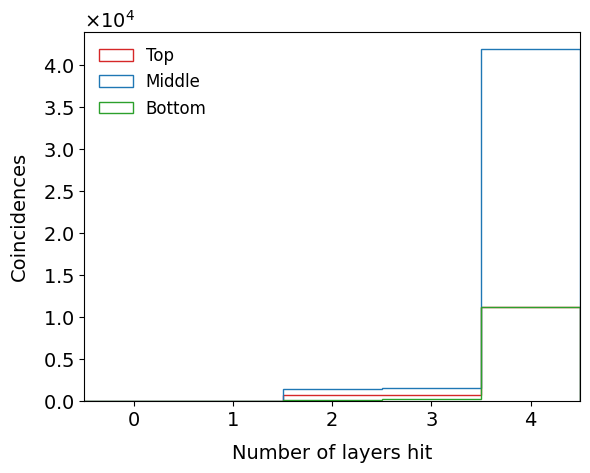

---> Written Images/Analyse/MDC2020ae/Sanity/h1_nLayers_all_10PEs2Layers_one_coincidence_per_trigger_sector.png


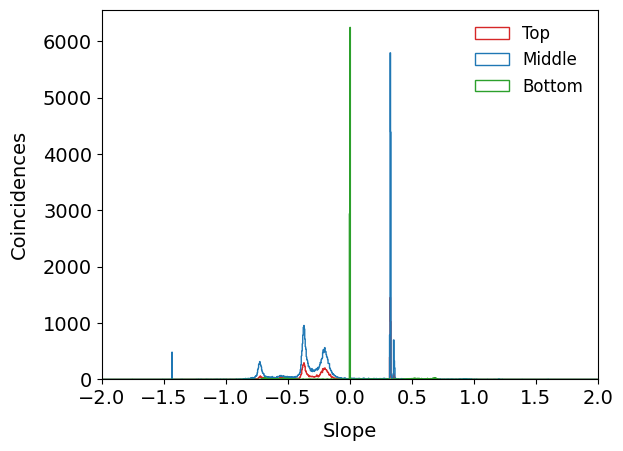

---> Written Images/Analyse/MDC2020ae/Sanity/h1_slopes_all_10PEs2Layers_one_coincidence_per_trigger_sector.png


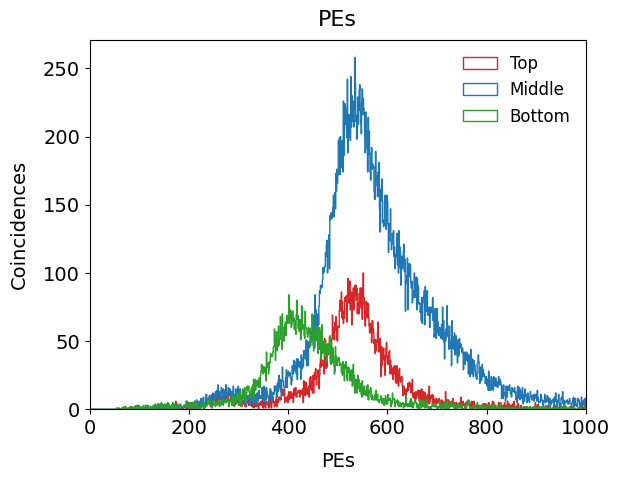

---> Written Images/Analyse/MDC2020ae/Sanity/h1_PEs_all_10PEs2Layers_one_coincidence_per_trigger_sector.png


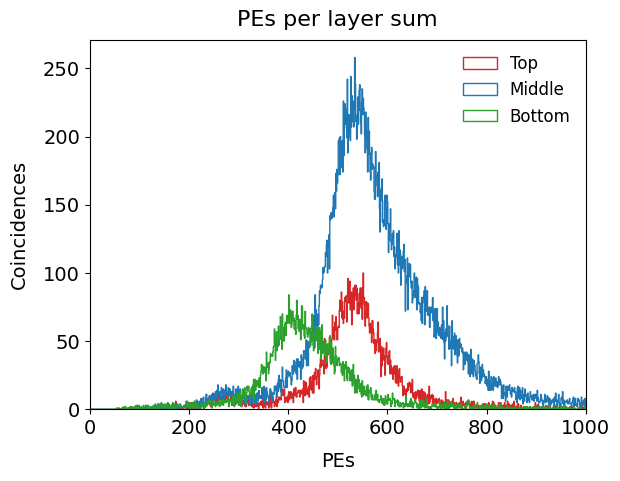

---> Written Images/Analyse/MDC2020ae/Sanity/h1_PEsPerLayer_all_10PEs2Layers_one_coincidence_per_trigger_sector.png


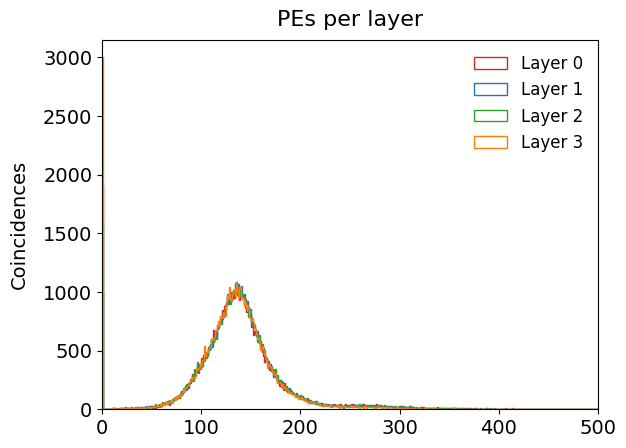

---> Written Images/Analyse/MDC2020ae/Sanity//h1_PEsPerLayerAllSectors_all_10PEs2Layers_one_coincidence_per_trigger_sector.png


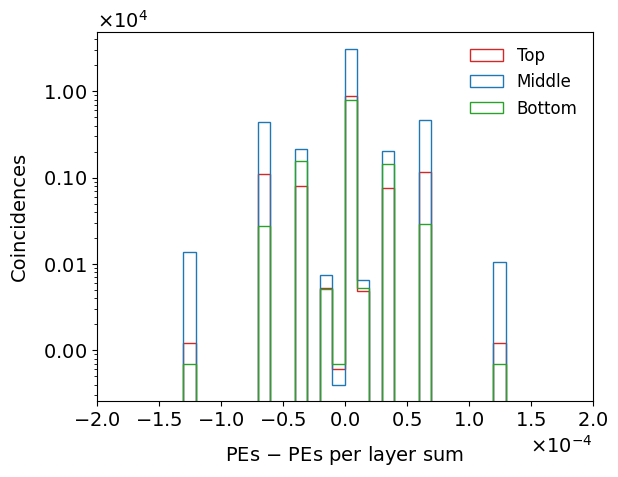

---> Written Images/Analyse/MDC2020ae/Sanity/h1_PEsDiff_all_10PEs2Layers_one_coincidence_per_trigger_sector.png


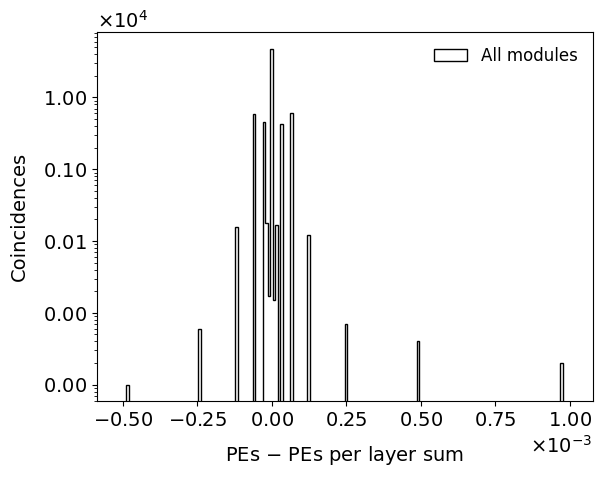

---> Written Images/Analyse/MDC2020ae/Sanity/h1_PEsDiffAll_all_10PEs2Layers_one_coincidence_per_trigger_sector.png


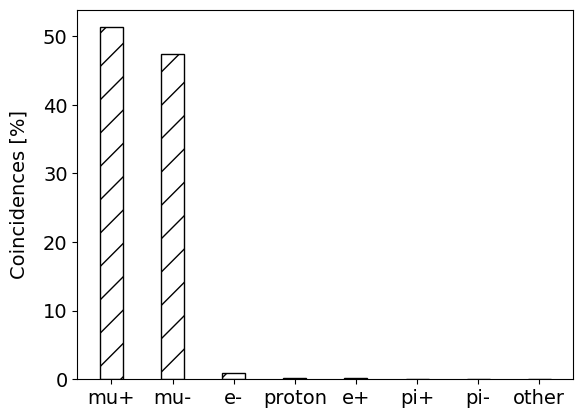

---> Written Images/Analyse/MDC2020ae/Sanity/bar_pdgid_all_10PEs2Layers_one_coincidence_per_trigger_sector.png


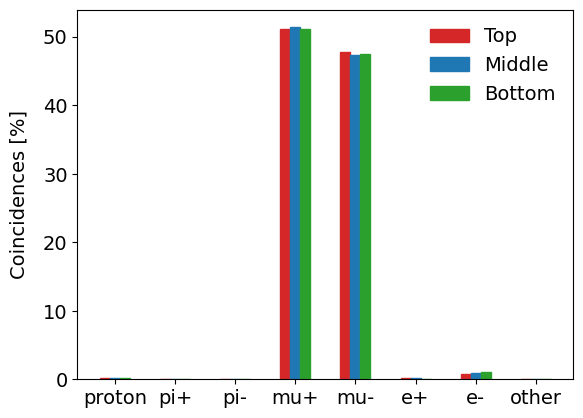

---> Written Images/Analyse/MDC2020ae/Sanity/bar_overlay_pdgid_all_10PEs2Layers_one_coincidence_per_trigger_sector.png


In [6]:
# Sanity plots
print("\n---> Making sanity plots")

# Reco
sectors_ = ak.flatten(arrays_["crvcoincs"]["crvcoincs.sectorType"]) 
t_ = ak.flatten(arrays_["crvcoincs"]["crvcoincs.time"]) 
x_ = ak.flatten(arrays_["crvcoincs"]["crvcoincs.pos.fCoordinates.fX"]) #* 1e-3 # mm -> m
y_ = ak.flatten(arrays_["crvcoincs"]["crvcoincs.pos.fCoordinates.fY"]) #* 1e-3 # mm -> m
z_ = ak.flatten(arrays_["crvcoincs"]["crvcoincs.pos.fCoordinates.fZ"]) #* 1e-3 # mm -> m
PEs_ = ak.flatten(arrays_["crvcoincs"]["crvcoincs.PEs"]) 
PEsPerLayer_ = ak.flatten(arrays_["crvcoincs"]["crvcoincs.PEsPerLayer[4]"])
nHits_ = ak.flatten(arrays_["crvcoincs"]["crvcoincs.nHits"]) 
nLayers_ = ak.flatten(arrays_["crvcoincs"]["crvcoincs.nLayers"]) 
slopes_ = ak.flatten(arrays_["crvcoincs"]["crvcoincs.angle"])

print("sectors_:", sectors_)
print("t_:", t_)
print("x_:", x_)
print("y_:", y_)
print("z_:", z_)
print("PEs_:", PEs_)
print("PEsPerLayer_:", PEsPerLayer_)
print("nHits_:", nHits_) 
print("nLayers_:", nLayers_)
print("slopes_:", slopes_)


PlotGraphOverlay(graphs_=[(x_[sectors_ == 3], y_[sectors_ == 3]), (x_[sectors_ == 1], y_[sectors_ == 1]), (x_[sectors_ == 2], y_[sectors_ == 2])]
                 , labels_=["Top", "Middle", "Bottom"], xlabel="x-position [mm]", ylabel="y-position [mm]", fout=f"Images/Analyse/{reproc}/Sanity/gr_XY_{foutTag}.png")
PlotGraphOverlay(graphs_=[(z_[sectors_ == 3], y_[sectors_ == 3]), (z_[sectors_ == 1], y_[sectors_ == 1]), (z_[sectors_ == 2], y_[sectors_ == 2])]
                 , labels_=["Top", "Middle", "Bottom"], xlabel="z-position [m]", ylabel="y-position [m]", fout=f"Images/Analyse/{reproc}/Sanity/gr_ZY_{foutTag}.png")
Plot1DOverlay(hists_=[t_[sectors_ == 3], t_[sectors_ == 1], t_[sectors_ == 2]], nbins=1000, xmin = np.min(t_), xmax = np.max(t_)
              , xlabel="Average hit time [ns]", ylabel="Coincidences", label_=["Top", "Middle", "Bottom"], fout=f"Images/Analyse/{reproc}/Sanity/h1_times_{foutTag}.png")
Plot1DOverlay(hists_=[nHits_[sectors_ == 3], nHits_[sectors_ == 1], nHits_[sectors_ == 2]], nbins=41, xmin = -0.5, xmax = 40.5
              , xlabel="Number of hits", ylabel="Coincidences", label_=["Top", "Middle", "Bottom"], fout=f"Images/Analyse/{reproc}/Sanity/h1_nHits_{foutTag}.png") 
Plot1DOverlay(hists_=[nLayers_[sectors_ == 3], nLayers_[sectors_ == 1], nLayers_[sectors_ == 2]], nbins=5, xmin = -0.5, xmax = 4.5
              , xlabel="Number of layers hit", ylabel="Coincidences", label_=["Top", "Middle", "Bottom"], fout=f"Images/Analyse/{reproc}/Sanity/h1_nLayers_{foutTag}.png") 
Plot1DOverlay(hists_=[slopes_[sectors_ == 3], slopes_[sectors_ == 1], slopes_[sectors_ == 2]], nbins=1000, xmin = -2, xmax = 2
              , xlabel="Slope", ylabel="Coincidences", label_=["Top", "Middle", "Bottom"], fout=f"Images/Analyse/{reproc}/Sanity/h1_slopes_{foutTag}.png") 

# Calculate the sum of each length-4 array in PEsPerLayer_
PEsPerLayerSum_ = ak.sum(PEsPerLayer_, axis=-1)
PEsDiff_ = PEs_ - PEsPerLayerSum_

Plot1DOverlay(hists_=[PEs_[sectors_ == 3], PEs_[sectors_ == 1], PEs_[sectors_ == 2]], nbins=1000, xmin = 0, xmax = 1000
              , title="PEs", xlabel="PEs", ylabel="Coincidences", label_=["Top", "Middle", "Bottom"], fout=f"Images/Analyse/{reproc}/Sanity/h1_PEs_{foutTag}.png")
Plot1DOverlay(hists_=[PEsPerLayerSum_[sectors_ == 3], PEsPerLayerSum_[sectors_ == 1], PEsPerLayerSum_[sectors_ == 2]], nbins=1000, xmin = 0, xmax = 1000
              , title="PEs per layer sum", xlabel="PEs", ylabel="Coincidences", label_=["Top", "Middle", "Bottom"], fout=f"Images/Analyse/{reproc}/Sanity/h1_PEsPerLayer_{foutTag}.png")
Plot1DOverlay(hists_=[PEsPerLayer_[:, 0], PEsPerLayer_[:, 1], PEsPerLayer_[:, 2], PEsPerLayer_[:, 3]], nbins=500, xmin = 0, xmax = 500
              , title="PEs per layer", ylabel="Coincidences", label_=["Layer 0", "Layer 1", "Layer 2", "Layer 3"], fout=f"Images/Analyse/{reproc}/Sanity//h1_PEsPerLayerAllSectors_{foutTag}.png")
Plot1DOverlay(hists_=[PEsDiff_[sectors_ == 3], PEsDiff_[sectors_ == 1], PEsDiff_[sectors_ == 2]], nbins=40, xmin = -0.0002, xmax = 0.0002
              , xlabel="PEs $\minus$ PEs per layer sum", ylabel="Coincidences", label_=["Top", "Middle", "Bottom"], fout=f"Images/Analyse/{reproc}/Sanity/h1_PEsDiff_{foutTag}.png", logY=True)
Plot1DOverlay(hists_=[PEsDiff_], nbins=200, xmin = np.min(PEsDiff_)-1e-4, xmax = np.max(PEsDiff_)+1e-4
              , xlabel="PEs $\minus$ PEs per layer sum", ylabel="Coincidences", label_=["All modules"], fout=f"Images/Analyse/{reproc}/Sanity/h1_PEsDiffAll_{foutTag}.png", logY=True, includeBlack=True)

label_dict = {
    2212: 'proton',
    211: 'pi+',
    -211: 'pi-',
    -13: 'mu+',
    13: 'mu-',
    -11: 'e+',
    11: 'e-',
    "other": "other"
    # Add more particle entries as needed
}

# MC 
valid_ = ak.flatten(arrays_["crvcoincsmc"]["crvcoincsmc.valid"])
pdgid_ = ak.flatten(arrays_["crvcoincsmc"]["crvcoincsmc.pdgId"])
    
BarChart(data_=pdgid_, label_dict=label_dict, ylabel="Coincidences [%]", fout=f"Images/Analyse/{reproc}/Sanity/bar_pdgid_{foutTag}.png", percentage=True)
BarChartOverlay(data_=[pdgid_[sectors_ == 3], pdgid_[sectors_ == 1], pdgid_[sectors_ == 2]], label_dict=label_dict
                , ylabel="Coincidences [%]", fout=f"Images/Analyse/{reproc}/Sanity/bar_overlay_pdgid_{foutTag}.png", percentage=True, label_= ["Top", "Middle", "Bottom"])



In [ ]:
def GoodCRV(arrays_): 
    
    
    
    

In [99]:
def FilterParticles(arrays_, particle):

    print(f"\n---> Filtering particles, keeping {particle}")

    # I think this really should be in trigger sectors only FIXME
    muonCondition = ak.any((data_[ut.coincsBranchName+"mc.pdgId"] == 13) | (data_[ut.coincsBranchName+"mc.pdgId"] == -13), axis=1)
    
    # Filter conditions
    goodCRVCondition = ak.any(arrays_["crvcoincs"]["crvcoincs.nHits"], axis=1, keepdims=False) > 0
    triggerSectorCondition = ak.any((arrays_["crvcoincs"]["crvcoincs.sectorType"] == 3), axis=1) & ak.any((arrays_["crvcoincs"]["crvcoincs.sectorType"] == 2), axis=1) 
    muonCondition = ak.all((abs(arrays_["crvcoincsmc"]["crvcoincsmc.pdgId"]) == 13), axis=1) & noCRVCondition 

    if particle == "all":
        return data_
    elif particle == "muons": 
        return data_[muonCondition] 
    elif particle == "non_muons":
        return data_[~muonCondition] 
    else:
        raise ValueError(f"Particle string {particle} not valid!")


# Filter conditions
goodCRVCondition = ak.any(arrays_["crvcoincs"]["crvcoincs.nHits"], axis=1, keepdims=False) > 0
muonCondition = ak.all((abs(arrays_["crvcoincsmc"]["crvcoincsmc.pdgId"]) == 13), axis=1) & noCRVCondition 
triggerSectorCondition = ak.any((arrays_["crvcoincs"]["crvcoincs.sectorType"] == 3), axis=1) & ak.any((arrays_["crvcoincs"]["crvcoincs.sectorType"] == 2), axis=1) 


# triggerSectorCondition = (arrays_["crvcoincs"]["crvcoincs.sectorType"] == 3) & (arrays_["crvcoincs"]["crvcoincs.sectorType"] == 2)
# muonCondition = (arrays_["crvcoincsmc"]["crvcoincsmc.pdgId"] == 13) | (arrays_["crvcoincsmc"]["crvcoincsmc.pdgId"] == -13)


# print(arrays_["crvcoincsmc"]["crvcoincsmc.pdgId"])
# print(arrays_["crvcoincsmc"]["crvcoincsmc.pdgId"])
# print(arrays_)
filteredArrays_ = arrays_[muonCondition & triggerSectorCondition]
# print(arrays_["crvcoincsmc"]["crvcoincsmc.pdgId"])
# filteredArrays_ = arrays_[muonCondition]
# print(filteredArrays_)
print(muonCondition[0])
print(triggerSectorCondition[0])
print(arrays_["evtinfo."]["evtinfo.event"][0])
print(arrays_["crvcoincsmc"]["crvcoincsmc.pdgId"][0])
print(arrays_["crvcoincs"]["crvcoincs.sectorType"][0])

# print(muonCondition)
# print(triggerSectorCondition)
# print(arrays_["crvcoincsmc"]["crvcoincsmc.pdgId"])
# print(arrays_["crvcoincs"]["crvcoincs.sectorType"])
print(filteredArrays_["evtinfo."]["evtinfo.event"][0])
print(filteredArrays_["crvcoincsmc"]["crvcoincsmc.pdgId"][0])

print(muonCondition)
print(triggerSectorCondition)
print(arrays_["evtinfo."]["evtinfo.event"])
print(arrays_["crvcoincsmc"]["crvcoincsmc.pdgId"])
print(arrays_["crvcoincs"]["crvcoincs.sectorType"])

print(filteredArrays_["evtinfo."]["evtinfo.event"])
print(filteredArrays_["crvcoincsmc"]["crvcoincsmc.pdgId"])
print(filteredArrays_["crvcoincs"]["crvcoincs.sectorType"])
# print(filteredArrays_["ev)
# print(filteredArrays_["crvcoincs"]["crvcoincs.sectorType"])

# arrays_["crvcoincs"] = arrays_["crvcoincs"][muonCondition]
# print(arrays_["crvcoincs"])
# if particle == "all":
#     return data_
# elif particle == "muons": 
#     return data_[muonCondition] 
# elif particle == "non_muons":
#     return data_[~muonCondition] 
# else:
#     raise ValueError(f"Particle string {particle} not valid!")

False
False
134
[]
[]
18240
[-13, -13, -13]
[False, False, False, False, False, ..., False, False, False, False, False]
[False, False, False, False, False, ..., False, False, False, False, False]
[134, 964, 1098, 1200, 1292, 1680, ..., 498793, 498919, 499050, 499263, 499848]
[[], [], [], [], [], [], [13], [], [], ..., [13], [], [], [], [], [], [], []]
[[], [], [], [], [], [], [1], [], [], ..., [], [1], [], [], [], [], [], [], []]
[18240, 23332, 28156, 33126, 38574, ..., 447276, 452464, 454219, 468905, 489272]
[[-13, -13, -13], [-13, -13, -13], [...], ..., [13, 13, 13], [-13, -13, -13]]
[[1, 2, 3], [1, 2, 3], [1, 2, 3], [...], ..., [1, 2, 3], [1, 2, 3], [1, 2, 3]]
